## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../Resources/charity_data.csv")
application_df.head()



,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


IS_SUCCESSFUL = Target

Features =APPLICATION_TYPE,AFFILIATION	CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS	INCOME_AMT,	SPECIAL_CONSIDERATIONS,	ASK_AMT

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(labels=["EIN", "NAME"], axis=1)
application_df.head()


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_counts = application_df["APPLICATION_TYPE"].value_counts()
app_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_counts[app_counts < 200].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df["CLASSIFICATION"].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1570        1
C2500        1
C5200        1
C1236        1
C6100        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [7]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
replace_class = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [8]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df, dtype=float)
application_df



,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train.shape


(25724, 43)

## Compile, Train and Evaluate the Model

In [11]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=80
hidden_nodes_layer2=30

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the model
nn_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy', tf.keras.metrics.Recall()])


In [13]:
# Train the model
fit_model = nn_model.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)


Epoch 1/100
684/684 [==============================] - 1s 862us/step - loss: 0.5732 - accuracy: 0.7167 - recall: 0.7783 - val_loss: 0.5524 - val_accuracy: 0.7305 - val_recall: 0.7934
Epoch 2/100
684/684 [==============================] - 0s 584us/step - loss: 0.5572 - accuracy: 0.7264 - recall: 0.7841 - val_loss: 0.5515 - val_accuracy: 0.7341 - val_recall: 0.7432
Epoch 3/100
684/684 [==============================] - 0s 592us/step - loss: 0.5538 - accuracy: 0.7285 - recall: 0.7888 - val_loss: 0.5449 - val_accuracy: 0.7336 - val_recall: 0.7685
Epoch 4/100
684/684 [==============================] - 0s 585us/step - loss: 0.5522 - accuracy: 0.7280 - recall: 0.7910 - val_loss: 0.5467 - val_accuracy: 0.7346 - val_recall: 0.7636
Epoch 5/100
684/684 [==============================] - 0s 585us/step - loss: 0.5504 - accuracy: 0.7304 - recall: 0.7932 - val_loss: 0.5481 - val_accuracy: 0.7349 - val_recall: 0.7735
Epoch 6/100
684/684 [==============================] - 0s 593us/step - loss: 0.5492 -

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy, model_Recall= nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5670 - accuracy: 0.7271 - recall: 0.7835 - 107ms/epoch - 400us/step
Loss: 0.5670377016067505, Accuracy: 0.7271137237548828


Accuracy: 0.7248979806900024

In [26]:
nn_model.save('../Instructions/Alphabet_Soup_model1.h5')


Bonus models to improve accuracy, and have visualizations for acc. and loss

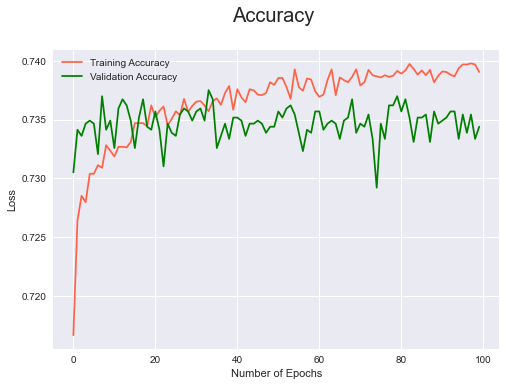

In [22]:
import matplotlib.pyplot as plt


#Accuracy Graph

plt.style.use('seaborn')
plt.title('Accuracy \n',fontsize=20)
plt.plot(fit_model.history['accuracy'], 'tomato', label='Training Accuracy')
plt.plot(fit_model.history['val_accuracy'], 'green',label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

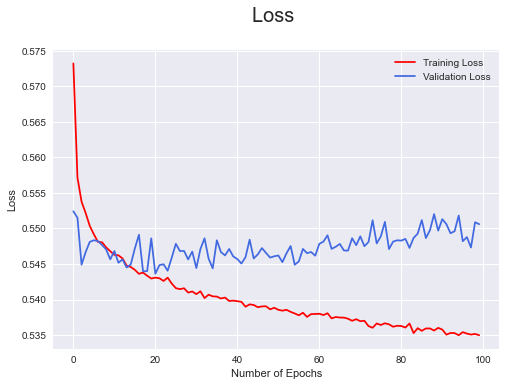

In [23]:
# Loss Chart
plt.style.use('seaborn')
plt.title('Loss \n',fontsize=20)
plt.plot(fit_model.history['loss'], 'red', label='Training Loss')
plt.plot(fit_model.history['val_loss'],'royalblue', label='Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
nn_model.save('../Instructions/Alphabet_Soup_model1.h5')


Evaluation 2

In [27]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=1450
hidden_nodes_layer2=80

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1450)              63800     
                                                                 
 dense_4 (Dense)             (None, 80)                116080    
                                                                 
 dense_5 (Dense)             (None, 1)                 81        
                                                                 
Total params: 179,961
Trainable params: 179,961
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compile the model
nn_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy', tf.keras.metrics.Recall()])

fit_model = nn_model.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)


Epoch 1/100
684/684 [==============================] - 1s 1ms/step - loss: 0.5700 - accuracy: 0.7213 - recall_1: 0.7802 - val_loss: 0.5533 - val_accuracy: 0.7349 - val_recall_1: 0.7715
Epoch 2/100
684/684 [==============================] - 1s 1ms/step - loss: 0.5582 - accuracy: 0.7263 - recall_1: 0.7889 - val_loss: 0.5508 - val_accuracy: 0.7346 - val_recall_1: 0.7675
Epoch 3/100
684/684 [==============================] - 1s 912us/step - loss: 0.5548 - accuracy: 0.7288 - recall_1: 0.7893 - val_loss: 0.5492 - val_accuracy: 0.7328 - val_recall_1: 0.7606
Epoch 4/100
684/684 [==============================] - 1s 840us/step - loss: 0.5536 - accuracy: 0.7304 - recall_1: 0.7898 - val_loss: 0.5479 - val_accuracy: 0.7346 - val_recall_1: 0.7795
Epoch 5/100
684/684 [==============================] - 1s 852us/step - loss: 0.5517 - accuracy: 0.7309 - recall_1: 0.7913 - val_loss: 0.5462 - val_accuracy: 0.7370 - val_recall_1: 0.7651
Epoch 6/100
684/684 [==============================] - 1s 886us/step 

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy, model_Recall= nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5766 - accuracy: 0.7290 - recall_1: 0.7938 - 121ms/epoch - 450us/step
Loss: 0.5766022205352783, Accuracy: 0.7289795875549316


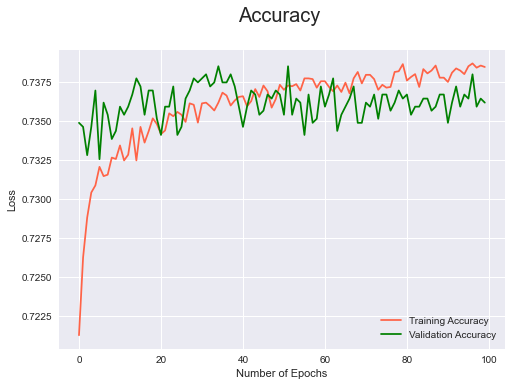

In [30]:
# Accuracy Graph
plt.style.use('seaborn')
plt.title('Accuracy \n',fontsize=20)
plt.plot(fit_model.history['accuracy'], 'tomato', label='Training Accuracy')
plt.plot(fit_model.history['val_accuracy'], 'green',label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

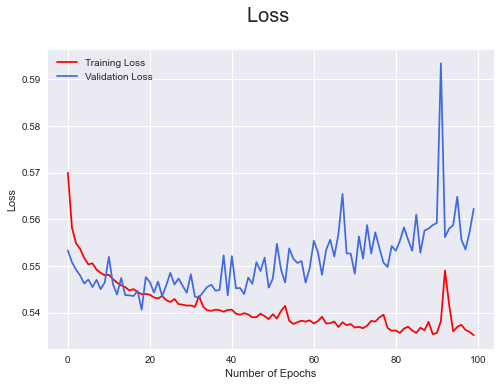

In [33]:
# Loss Graph
plt.style.use('seaborn')
plt.title('Loss \n',fontsize=20)
plt.plot(fit_model.history['loss'], 'red', label='Training Loss')
plt.plot(fit_model.history['val_loss'],'royalblue', label='Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [35]:
nn_model.save('../Instructions/Alphabet_Soup_model2.h5')


Evaluation 3

In [36]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=3
hidden_nodes_layer2=15
hidden_nodes_layer3=3

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Third hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3)                 132       
                                                                 
 dense_7 (Dense)             (None, 15)                60        
                                                                 
 dense_8 (Dense)             (None, 3)                 48        
                                                                 
 dense_9 (Dense)             (None, 1)                 4         
                                                                 
Total params: 244
Trainable params: 244
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Compile the model
nn_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy', tf.keras.metrics.Recall()])


fit_model = nn_model.fit( X_train_scaled,y_train,validation_split=0.15,epochs=100)

Epoch 1/100
684/684 [==============================] - 1s 744us/step - loss: 0.6395 - accuracy: 0.6368 - recall_2: 0.7860 - val_loss: 0.5758 - val_accuracy: 0.7196 - val_recall_2: 0.7297
Epoch 2/100
684/684 [==============================] - 0s 608us/step - loss: 0.5766 - accuracy: 0.7140 - recall_2: 0.7494 - val_loss: 0.5593 - val_accuracy: 0.7269 - val_recall_2: 0.7432
Epoch 3/100
684/684 [==============================] - 0s 624us/step - loss: 0.5666 - accuracy: 0.7162 - recall_2: 0.7557 - val_loss: 0.5583 - val_accuracy: 0.7282 - val_recall_2: 0.7471
Epoch 4/100
684/684 [==============================] - 0s 624us/step - loss: 0.5637 - accuracy: 0.7166 - recall_2: 0.7603 - val_loss: 0.5567 - val_accuracy: 0.7271 - val_recall_2: 0.7461
Epoch 5/100
684/684 [==============================] - 0s 636us/step - loss: 0.5622 - accuracy: 0.7161 - recall_2: 0.7833 - val_loss: 0.5560 - val_accuracy: 0.7219 - val_recall_2: 0.8243
Epoch 6/100
684/684 [==============================] - 0s 633us/s

In [38]:
# Evaluate the model using the test data
model_loss, model_accuracy, model_Recall= nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5611 - accuracy: 0.7145 - recall_2: 0.7320 - 104ms/epoch - 388us/step
Loss: 0.5610824823379517, Accuracy: 0.7145189642906189


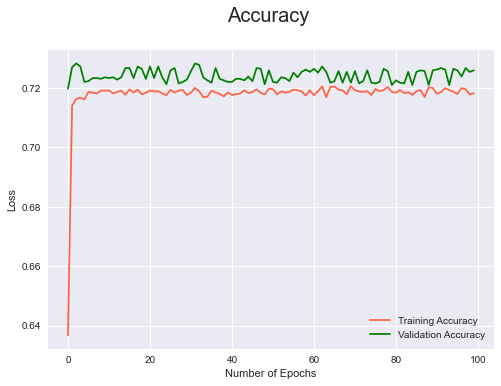

In [39]:
# Accuracy Graph
plt.style.use('seaborn')
plt.title('Accuracy \n',fontsize=20)
plt.plot(fit_model.history['accuracy'], 'tomato', label='Training Accuracy')
plt.plot(fit_model.history['val_accuracy'], 'green',label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

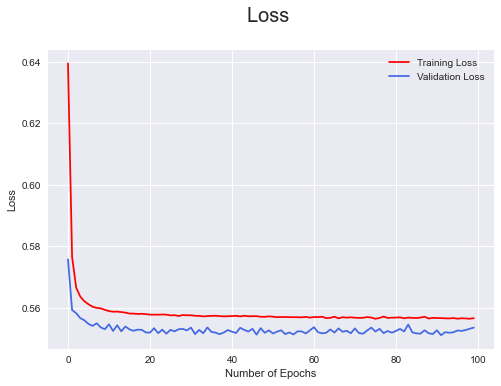

In [40]:
# Loss Graph
plt.style.use('seaborn')
plt.title('Loss \n',fontsize=20)
plt.plot(fit_model.history['loss'], 'red', label='Training Loss')
plt.plot(fit_model.history['val_loss'],'royalblue', label='Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [41]:
nn_model.save('../Instructions/Alphabet_Soup_model3.h5')


 Accuracy: 0.7145189642906189

